In [7]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model


In [2]:
copper = yf.Ticker("HG=F")
hist = copper.history(period="10y")

Epoch 1/1000


c:\Users\sadoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0117 - val_loss: 0.0024
Epoch 2/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 3/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 4/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 5/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 6/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 7/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - val_loss: 9.3971e-04
Epoch 8/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3173e-04 - val_loss: 0.0010
Epoch 9/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9081e-04 - val_loss: 9.3555e-04
Epoch 10/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7757e-04 - val_loss: 0.0032
Epoch 11/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 12/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1

C:\Users\sadoo\AppData\Local\Temp\ipykernel_31404\2760914980.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_df = pd.concat([comparison_df, future_df])


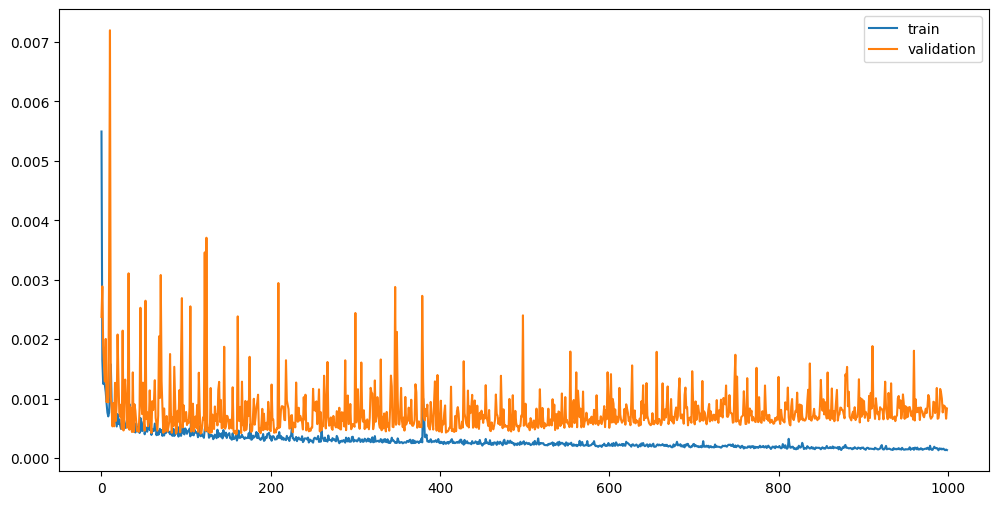

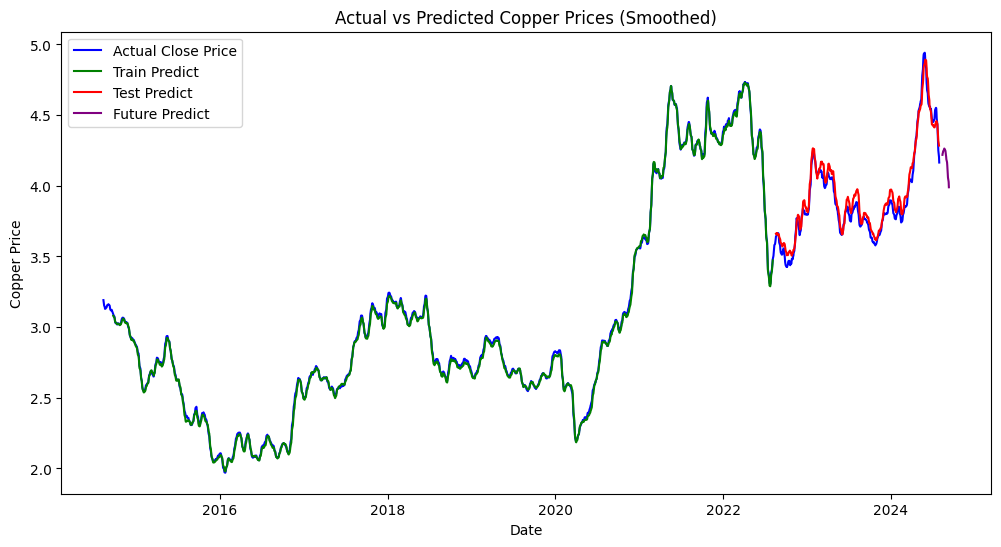

Comparison DataFrame
Future Predictions: [4.161001  4.215101  4.1953197 4.1849556 4.210178  4.2382026 4.235708
 4.2198925 4.258689  4.27046   4.2740293 4.2482367 4.2991214 4.2746696
 4.267259  4.2884984 4.205624  4.1960545 4.1509733 4.1375866 4.130128
 4.1231375 4.104745  4.0627213 4.048062  4.005126  3.9263108 3.898607
 3.8365595 3.7602947]


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming the DataFrame 'hist' is already loaded and 'Date' is the index
# We will use the 'Close' prices for forecasting
data = hist[['Close']].copy()

# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

# Define the window size
window_size = 30

def create_dataset(dataset, window_size):
    X, y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        X.append(a)
        y.append(dataset[i + window_size, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, window_size)

# Reshape the data to fit the model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Build the 1D-CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Create a DataFrame for Actual vs Predicted
train_predict_series = pd.Series(train_predict.flatten(), index=data.index[window_size:len(train_predict) + window_size])
test_predict_series = pd.Series(test_predict.flatten(), index=data.index[len(train_predict) + (window_size):len(train_predict) + (window_size) + len(test_predict)])

comparison_df = pd.DataFrame({
    'Actual': data['Close'],
    'Train Predict': train_predict_series,
    'Test Predict': test_predict_series
})

# Forecast future copper prices
future_steps = 30
last_window = X_test[-1]

future_predictions = []
for _ in range(future_steps):
    next_step = model.predict(last_window.reshape(1, window_size, 1))
    future_predictions.append(next_step[0, 0])
    last_window = np.append(last_window[1:], next_step, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create future dates for the prediction
last_date = data.index[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='B')[1:]  # Exclude the last_date itself

# Create a series for future predictions
future_predict_series = pd.Series(future_predictions.flatten(), index=future_dates)

# Add future predictions to the comparison DataFrame
future_df = pd.DataFrame({
    'Actual': [np.nan] * len(future_predict_series),
    'Train Predict': [np.nan] * len(future_predict_series),
    'Test Predict': [np.nan] * len(future_predict_series),
    'Future Predict': future_predict_series
})

comparison_df = pd.concat([comparison_df, future_df])

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Apply smoothing with rolling mean
smoothed_actual = pd.Series(scaler.inverse_transform(scaled_data).flatten(), index=data.index).rolling(window=10).mean()
smoothed_train_predict = train_predict_series.rolling(window=10).mean()
smoothed_test_predict = test_predict_series.rolling(window=10).mean()
smoothed_future_predict = future_predict_series.rolling(window=10).mean()

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, smoothed_actual, label='Actual Close Price', color='blue')
plt.plot(smoothed_train_predict, label='Train Predict', color='green')
plt.plot(smoothed_test_predict, label='Test Predict', color='red')
plt.plot(smoothed_future_predict, label='Future Predict', color='purple')
plt.xlabel('Date')
plt.ylabel('Copper Price')
plt.title('Actual vs Predicted Copper Prices (Smoothed)')
plt.legend()
plt.show()

# Display the table
print("Comparison DataFrame")
comparison_df.tail(60)  # Display the last 30 entries for brevity

print("Future Predictions:", future_predictions.flatten())

In [15]:
comparison_df['Error'] = comparison_df['Actual'] - comparison_df['Test Predict']

In [22]:
comparison_df['Error %'] = (comparison_df['Error'] / comparison_df['Actual']) * 100

In [23]:
final_comparison_df = comparison_df[['Actual', 'Test Predict', 'Error', 'Error %', 'Future Predict']]

In [25]:
# Find average error percentage 
average_error_percentage = final_comparison_df['Error %'].mean()

In [26]:
average_error_percentage

-1.010840557441268

In [24]:
final_comparison_df.tail(60)

,Actual,Test Predict,Error,Error %,Future Predict
2024-06-17 00:00:00-04:00,4.5215,4.460737,0.060763,1.343866,NaN
2024-06-18 00:00:00-04:00,4.5620,4.379329,0.182671,4.004188,NaN
2024-06-20 00:00:00-04:00,4.6180,4.453730,0.164270,3.557176,NaN
2024-06-21 00:00:00-04:00,4.4940,4.500440,-0.006440,-0.143295,NaN
2024-06-24 00:00:00-04:00,4.5270,4.495223,0.031777,0.701942,NaN
2024-06-25 00:00:00-04:00,4.3810,4.491873,-0.110873,-2.530774,NaN
2024-06-26 00:00:00-04:00,4.3675,4.396423,-0.028923,-0.662233,NaN
2024-06-27 00:00:00-04:00,4.3285,4.360154,-0.031654,-0.731301,NaN
2024-06-28 00:00:00-04:00,4.3905,4.346323,0.044177,1.006186,NaN
2024-07-01 00:00:00-04:00,4.4265,4.418543,0.007957,0.179758,NaN
